In [20]:
import os
import pandas as pd
import numpy as np
import time
from datetime import timedelta
from pmdarima.arima import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [21]:
raspberry = "ARpi1"
path = "dataset/results/"+raspberry
files = ["2019-05-13 00-00-01 scd30.csv","2019-05-28 01-00-01 scd30.csv","2019-06-13 01-00-02 scd30.csv",
          "2019-05-20 00-00-01 scd30.csv","2019-06-10 01-00-02 scd30.csv","2019-05-29 01-00-02 scd30.csv"]

In [22]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H-%M-%S')
data = pd.read_csv(path+'/'+files[1], parse_dates=['Time'], index_col='Time',date_parser=dateparse)
idx = pd.date_range(start=data.index[0],end=data.index[-1],freq="S")
dataFix = data.reindex(idx, fill_value=np.nan)
dataFix = dataFix.interpolate()
dataFix = dataFix[dataFix["#CO2"]<=7000]["#CO2"]
date_rng = pd.date_range(start=dataFix.index[0], end=dataFix.index[-1], freq='5T')

ts = dataFix[date_rng[0]:date_rng[4]]

samples = []

titles = ["5S sampling","10S sampling","20S sampling","50S sampling","100 sampling","200S sampling"]

samples.append(ts.resample("5S").mean())
samples.append(ts.resample("10S").mean())
samples.append(ts.resample("20S").mean())
samples.append(ts.resample("50S").mean())
samples.append(ts.resample("100S").mean())
samples.append(ts.resample("200S").mean())

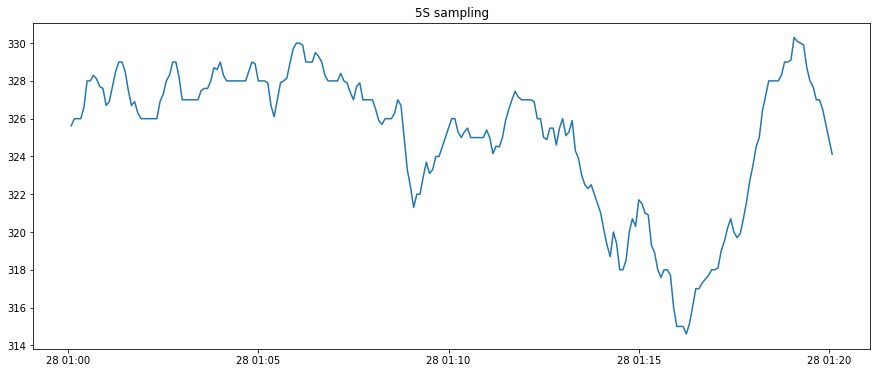

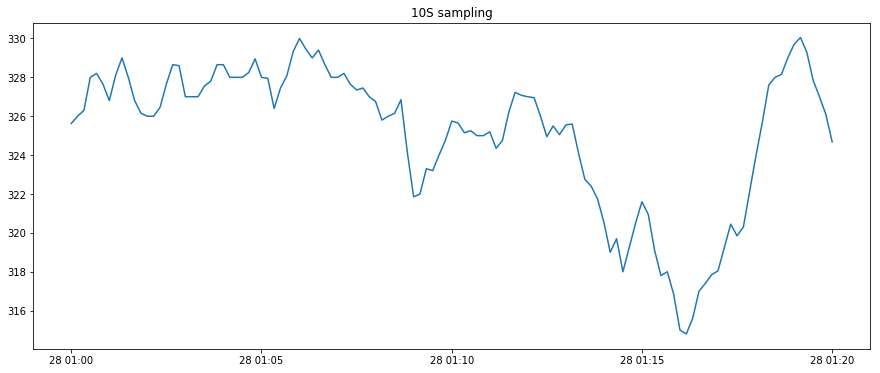

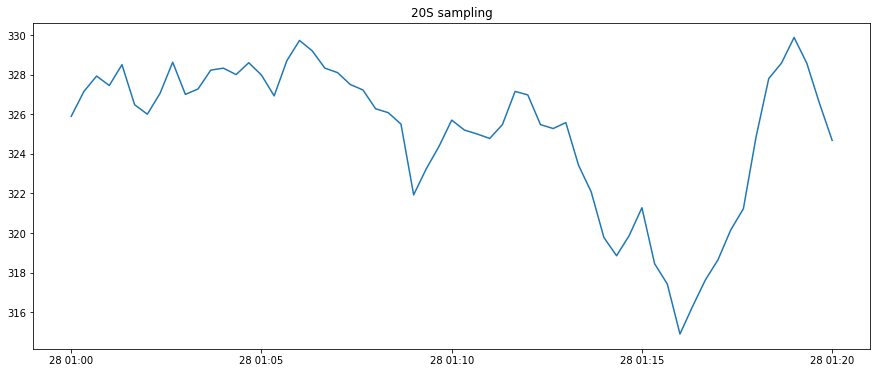

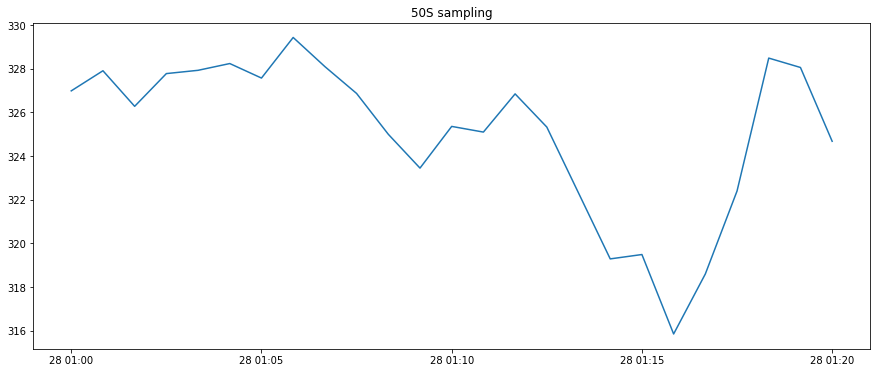

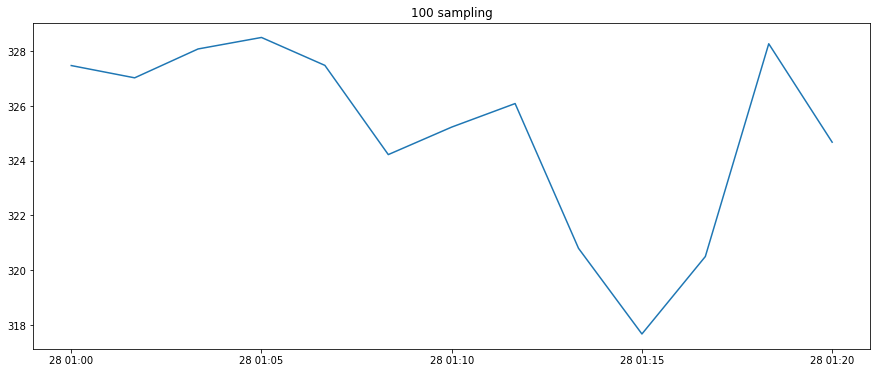

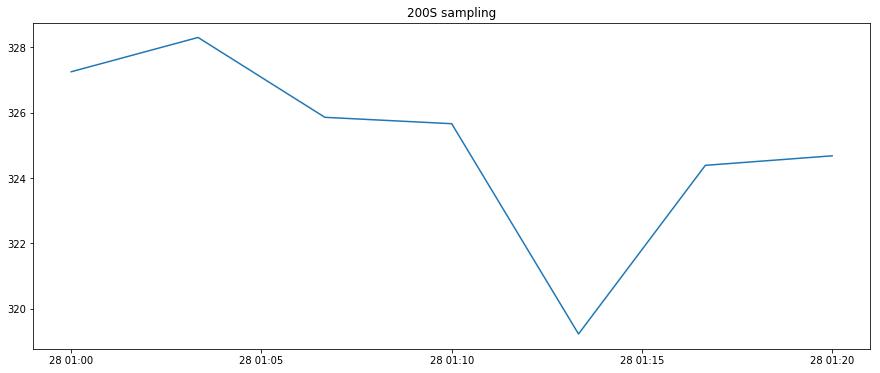

In [23]:
i = 0
for s in samples:
    plt.figure()
    plt.plot(s)
    plt.title(titles[i])
    i+=1